Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')

In [1]:
## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [15]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [16]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

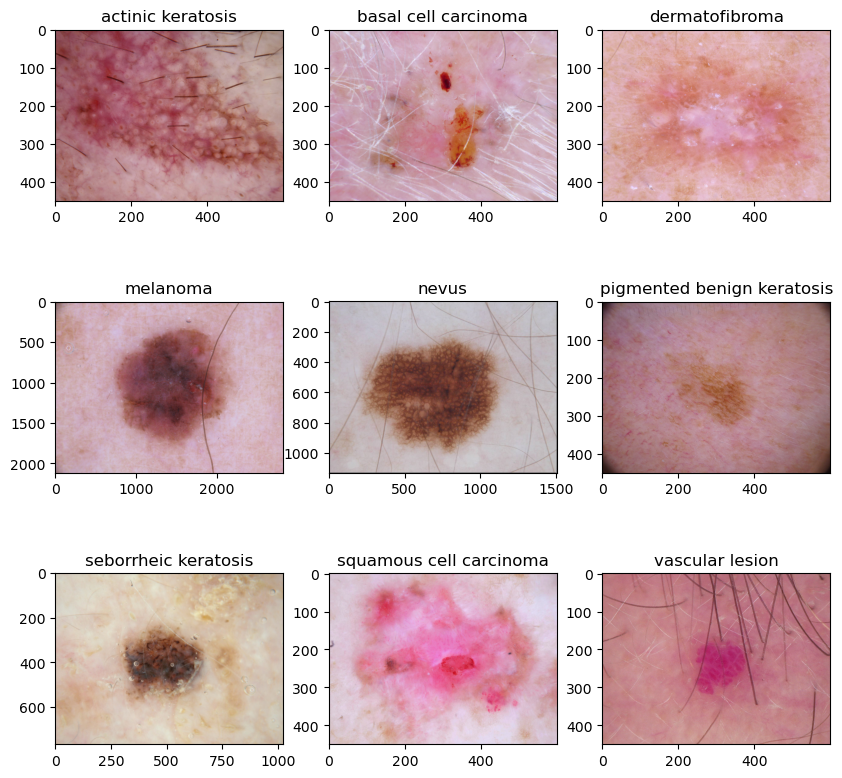

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  image=plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[0]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [22]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [23]:
### Your code goes here
from keras.layers  import Dense,Dropout,Flatten,Conv2D,MaxPool2D
num_classes=9
model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3))
])
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',
                 input_shape=(180,180,32)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes,activation='Softmax'))



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [24]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)       

### Train the model

In [26]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 80s 1s/step - loss: 2.0762 - accuracy: 0.1842 - val_loss: 2.0487 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 71s 1s/step - loss: 1.9421 - accuracy: 0.2545 - val_loss: 1.8224 - val_accuracy: 0.3333
Epoch 3/20
56/56 [==============================] - 71s 1s/step - loss: 1.8111 - accuracy: 0.3125 - val_loss: 1.8002 - val_accuracy: 0.3691
Epoch 4/20
56/56 [==============================] - 75s 1s/step - loss: 1.7441 - accuracy: 0.3493 - val_loss: 1.6233 - val_accuracy: 0.3848
Epoch 5/20
56/56 [==============================] - 76s 1s/step - loss: 1.6723 - accuracy: 0.3940 - val_loss: 1.6594 - val_accuracy: 0.3736
Epoch 6/20
56/56 [==============================] - 81s 1s/step - loss: 1.5642 - accuracy: 0.4213 - val_loss: 1.7192 - val_accuracy: 0.4385
Epoch 7/20
56/56 [==============================] - 77s 1s/step - loss: 1.5796 - accuracy: 0.4235 - val_loss: 1.5955 - val_accuracy: 0.4206
Epoch 8/20
56/56 [==

### Visualizing training results

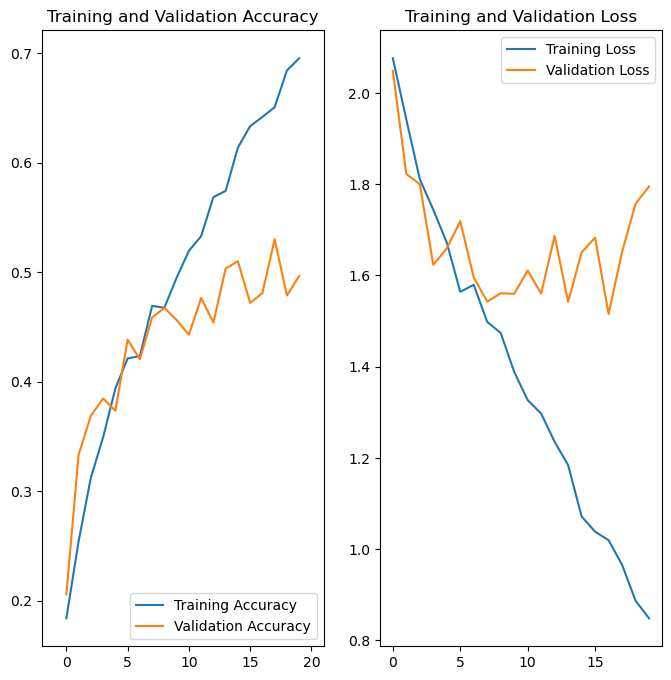

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.xlim(-2,21)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### THE MODEL IS OVERFITTING BECAUSE IF WE OBSERVE  THE EPOCH THE TRAING AND VALIDATION ACCURACY ARE NEAR IT IS TRING TO CONNECT EVERY POINT

### <B><FONT COLOR='RED'>THE ACCURACY OF THE TRAINING MODEL IS NEARLY 70% WHERE AS THE VALIDATION ACCURACY IS 52%</FONT></B>

In [28]:
from tensorflow import keras
from keras.layers.preprocessing.image_preprocessing import RandomRotation
from keras.api._v2.keras import preprocessing,experimental
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augument=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical',input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.2,fill_mode='reflect'),
    layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


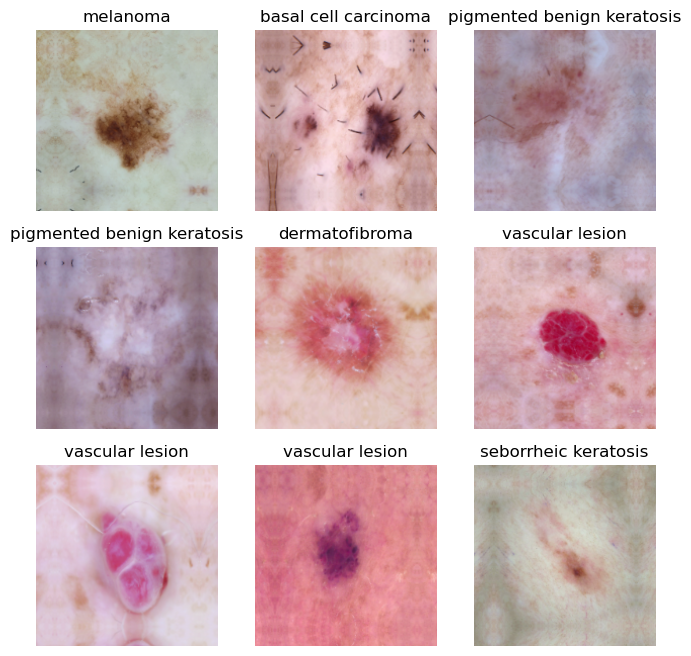

In [29]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(8,8))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(data_augument(images)[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [30]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [31]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 81s 1s/step - loss: 0.8744 - accuracy: 0.6763 - val_loss: 1.8278 - val_accuracy: 0.4899
Epoch 2/20
56/56 [==============================] - 78s 1s/step - loss: 0.7456 - accuracy: 0.7221 - val_loss: 1.8211 - val_accuracy: 0.5034
Epoch 3/20
56/56 [==============================] - 81s 1s/step - loss: 0.7338 - accuracy: 0.7294 - val_loss: 1.8340 - val_accuracy: 0.5101
Epoch 4/20
56/56 [==============================] - 98s 2s/step - loss: 0.6591 - accuracy: 0.7561 - val_loss: 2.0425 - val_accuracy: 0.4765
Epoch 5/20
56/56 [==============================] - 94s 2s/step - loss: 0.5894 - accuracy: 0.7840 - val_loss: 2.1575 - val_accuracy: 0.4944
Epoch 6/20
56/56 [==============================] - 79s 1s/step - loss: 0.5448 - accuracy: 0.7958 - val_loss: 2.2239 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 77s 1s/step - loss: 0.4937 - accuracy: 0.8103 - val_loss: 2.2375 - val_accuracy: 0.5034
Epoch 8/20
56/56 [==

### Visualizing the results

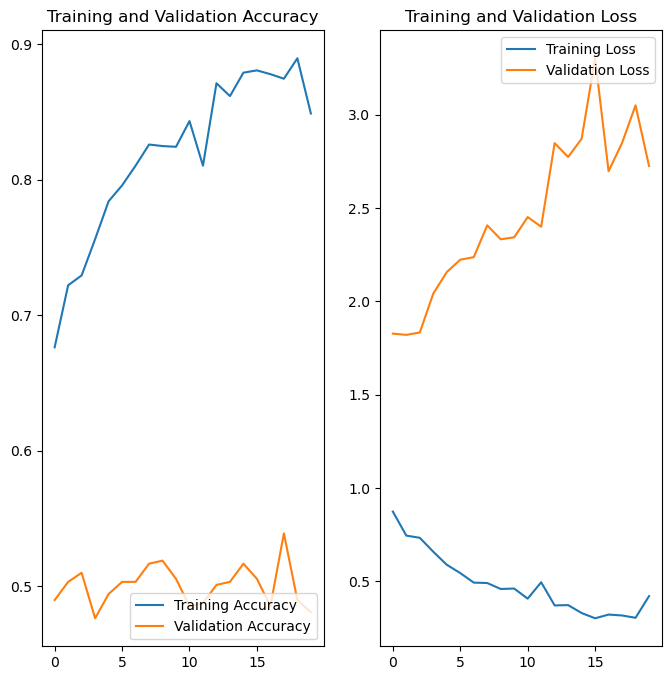

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## SECOND MODEL
### 	THERE IS NO IMPROVEMENT IN ACCURACY BUT WE CAN DEFINITELY SEE THE OVERFITTING PROBLEM HAS SOLVED DUE TO DATA AUGMENTATION
### WE CAN INCREASE THE EPOCHS TO INCREASE THE ACCURACY SO IT'S TOO EARLY FOR JUDGEMENT



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [33]:

path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df


,Path,Label
0,C:\Users\shaik\Skin cancer ISIC The Internatio...,actinic keratosis
1,C:\Users\shaik\Skin cancer ISIC The Internatio...,actinic keratosis
2,C:\Users\shaik\Skin cancer ISIC The Internatio...,actinic keratosis
3,C:\Users\shaik\Skin cancer ISIC The Internatio...,actinic keratosis
4,C:\Users\shaik\Skin cancer ISIC The Internatio...,actinic keratosis
...,...,...
2234,C:\Users\shaik\Skin cancer ISIC The Internatio...,vascular lesion
2235,C:\Users\shaik\Skin cancer ISIC The Internatio...,vascular lesion
2236,C:\Users\shaik\Skin cancer ISIC The Internatio...,vascular lesion
2237,C:\Users\shaik\Skin cancer ISIC The Internatio...,vascular lesion


<BarContainer object of 9 artists>

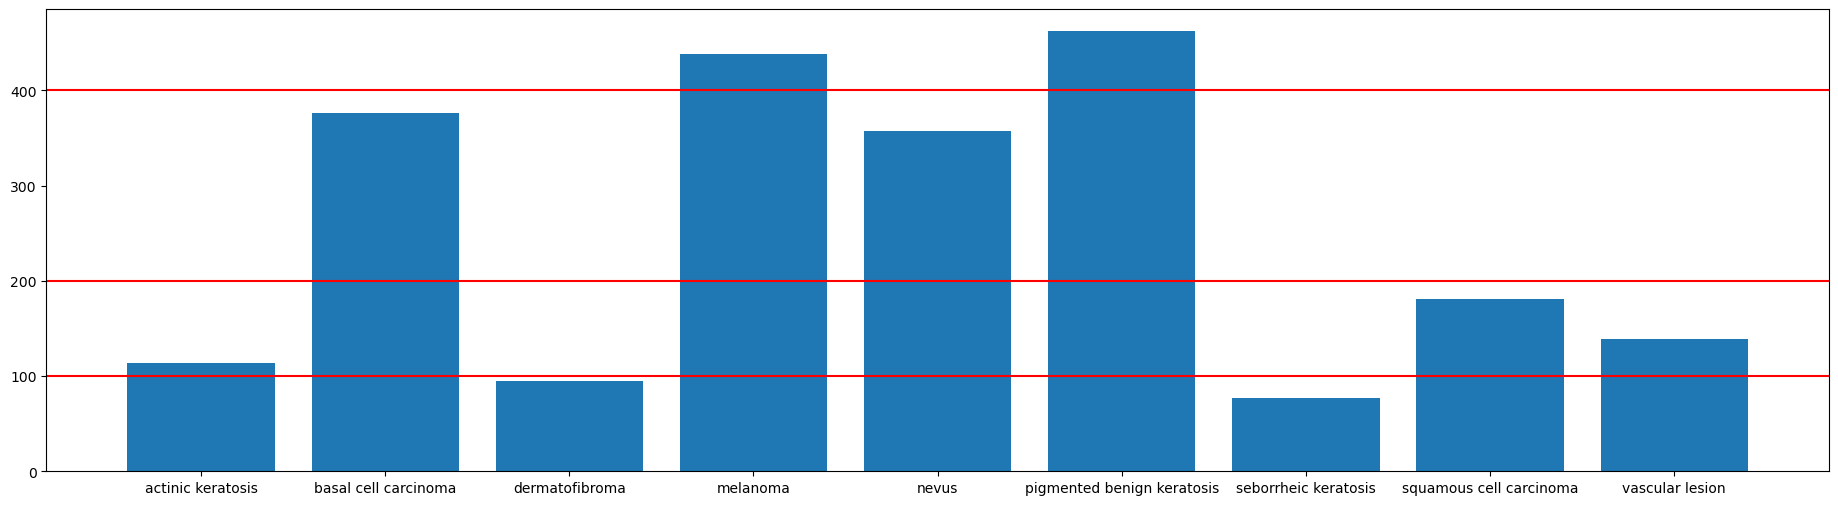

In [34]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(23,6))
# plt.xticks(rotation=90)
plt.axhline(100,color='r')
plt.axhline(200,color='r')
plt.axhline(400,color='r')


plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


###  **FROM THE BAR GRPAH WE OBSERVE THAT**

### `seborrheic keratosis` HAS THE LEAST NUMBER OF SAMPLES
### `melanoma and pigmented benign keratosis` HAVE PROPORTIONATE NUMBER OF SAMPLES 

In [35]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [36]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [38]:
# path_to_training_dataset="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=2126x2185 at 0x1C85A0760E0>: 100%|█| 500/500 [00:13<00:00, 36.41 Sample


Initialised with 2239 image(s) found.
Output directory set to C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C814F47BB0>: 100%|█| 500/500 [00:13<00:


Initialised with 2239 image(s) found.
Output directory set to C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C86BACED10>: 100%|█| 500/500 [00:20<00:00, 24.93 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C868D43D60>: 100%|█| 500/500 [00:18<00:00, 27.02 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C868D405E0>: 100%|█| 500/500 [00:18<00:00, 27.19 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C815137C70>: 100%|█| 500/500 [00:19<00:00, 26.05 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1C8087D9AB0>: 100%|█| 500/500 [00:18<00:00, 26.41 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C815137D00>: 100%|█| 500/500 [00:20<00:00, 24.76 Samples/


Initialised with 2239 image(s) found.
Output directory set to C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1C868D43A00>: 100%|█| 500/500 [00:19<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [39]:
data_dir_train1=pathlib.Path('C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

0


### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
##
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,C:\Users\shaik\Skin cancer ISIC The Internatio...,actinic keratosis
1,C:\Users\shaik\Skin cancer ISIC The Internatio...,actinic keratosis
2,C:\Users\shaik\Skin cancer ISIC The Internatio...,actinic keratosis
3,C:\Users\shaik\Skin cancer ISIC The Internatio...,actinic keratosis
4,C:\Users\shaik\Skin cancer ISIC The Internatio...,actinic keratosis
...,...,...
6734,C:\Users\shaik\Skin cancer ISIC The Internatio...,vascular lesion
6735,C:\Users\shaik\Skin cancer ISIC The Internatio...,vascular lesion
6736,C:\Users\shaik\Skin cancer ISIC The Internatio...,vascular lesion
6737,C:\Users\shaik\Skin cancer ISIC The Internatio...,vascular lesion


Lets see the distribution of augmented data after adding new images to the original training data.

In [41]:
new_df['Label'].value_counts()

pigmented benign keratosis    1415
melanoma                      1341
basal cell carcinoma          1136
nevus                         1066
squamous cell carcinoma        524
vascular lesion                391
actinic keratosis              340
dermatofibroma                 290
seborrheic keratosis           236
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [44]:
data_dir_train="C:/Users/shaik/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [52]:
## your code goes here

model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3))
])

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(180,180,32)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [53]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [54]:
## Your code goes here, note: train your model for 20 epochs
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
169/169 [==============================] - 663s 4s/step - loss: 1.9192 - accuracy: 0.6387 - val_loss: 1.7816 - val_accuracy: 0.6726
Epoch 2/25
169/169 [==============================] - 690s 4s/step - loss: 1.6637 - accuracy: 0.6665 - val_loss: 1.5713 - val_accuracy: 0.6726
Epoch 3/25
169/169 [==============================] - 702s 4s/step - loss: 1.4992 - accuracy: 0.6665 - val_loss: 1.4444 - val_accuracy: 0.6726
Epoch 4/25
169/169 [==============================] - 695s 4s/step - loss: 1.4047 - accuracy: 0.6665 - val_loss: 1.3757 - val_accuracy: 0.6726
Epoch 5/25
169/169 [==============================] - 693s 4s/step - loss: 1.3553 - accuracy: 0.6665 - val_loss: 1.3413 - val_accuracy: 0.6726
Epoch 6/25
169/169 [==============================] - 697s 4s/step - loss: 1.3306 - accuracy: 0.6665 - val_loss: 1.3251 - val_accuracy: 0.6726
Epoch 7/25
169/169 [==============================] - 692s 4s/step - loss: 1.3184 - accuracy: 0.6665 - val_loss: 1.3172 - val_accuracy: 0.6726

#### **Todo:**  Visualize the model results

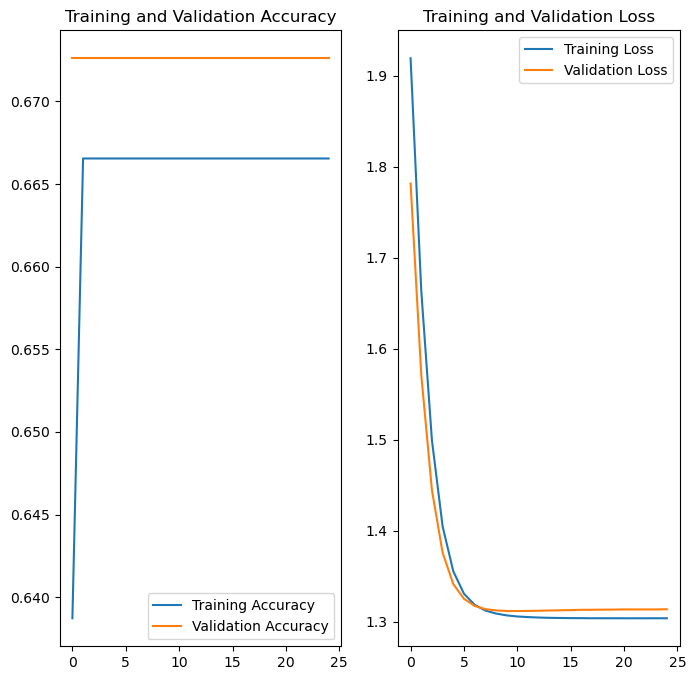

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- **THE TRAINING ACCURACY WENT DOWN**
- **WHERE HAS VALAIDATION ACCURACY IS HIGHER THAN THE TRAINING**
- **THE MODEL IS UNDERFITTING**
- **WE CAN INCREAS BY ADDING MORE EPOCHS**
- **The Model can be further improved by tuning the hyperparameter**